In [1]:
!pip install streamlit
!pip install matplotlib
!pip install pandas 
!pip install scikit-learn
!pip install numpy

In [44]:
import pandas as pd
import matplotlib as plt
pd.set_option('display.max_columns',100)

df = pd.read_csv("survey_results_public.csv")

In [45]:
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end

In [46]:
df.shape

(89184, 84)

In [47]:
df.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [48]:
df = df[['Country','Employment', 'EdLevel', 'YearsCodePro', 'ConvertedCompYearly']]
df.rename({'ConvertedCompYearly' : 'Salary'},axis=1, inplace = True)
df.head()

,Country,Employment,EdLevel,YearsCodePro,Salary
0,NaN,NaN,NaN,NaN,NaN
1,United States of America,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,285000.0
2,United States of America,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,250000.0
3,United States of America,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,156000.0
4,Philippines,"Employed, full-time;Independent contractor, fr...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,23456.0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       87973 non-null  object 
 1   Employment    87898 non-null  object 
 2   EdLevel       87973 non-null  object 
 3   YearsCodePro  66136 non-null  object 
 4   Salary        48019 non-null  float64
dtypes: float64(1), object(4)
memory usage: 3.4+ MB


In [50]:
df.dropna(inplace=True)
df.isnull().sum()

Country         0
Employment      0
EdLevel         0
YearsCodePro    0
Salary          0
dtype: int64

In [51]:
df.head()

,Country,Employment,EdLevel,YearsCodePro,Salary
1,United States of America,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,285000.0
2,United States of America,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,250000.0
3,United States of America,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,156000.0
4,Philippines,"Employed, full-time;Independent contractor, fr...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,23456.0
5,United Kingdom of Great Britain and Northern I...,"Employed, full-time",Some college/university study without earning ...,21,96828.0


In [52]:
df.shape

(47813, 5)

In [53]:
df = df[df['Employment'] == 'Employed, full-time']
df = df.drop('Employment',axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Salary
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,156000.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,96828.0
6,United States of America,Some college/university study without earning ...,3,135000.0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39155 entries, 1 to 89171
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       39155 non-null  object 
 1   EdLevel       39155 non-null  object 
 2   YearsCodePro  39155 non-null  object 
 3   Salary        39155 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [55]:
df['Country'].value_counts()

Country
United States of America                                10569
Germany                                                  3201
United Kingdom of Great Britain and Northern Ireland     3072
Canada                                                   1807
India                                                    1600
                                                        ...  
Botswana                                                    1
Sierra Leone                                                1
Guyana                                                      1
Guinea-Bissau                                               1
Antigua and Barbuda                                         1
Name: count, Length: 165, dtype: int64

In [56]:
def shorten_category(categories, cutoff):
    categorical_map={}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else: 
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map           
            

In [57]:
country_map = shorten_category(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Country
United States of America                                10569
Other                                                    9282
Germany                                                  3201
United Kingdom of Great Britain and Northern Ireland     3072
Canada                                                   1807
India                                                    1600
France                                                   1458
Netherlands                                              1002
Australia                                                 985
Brazil                                                    972
Spain                                                     966
Sweden                                                    882
Italy                                                     826
Poland                                                    740
Switzerland                                               511
Denmark                                                   440


In [58]:
df = df[~((df['Salary'] >= 250000) | (df['Salary'] <= 10000))]
df[(df['Salary'] >= 250000) | (df['Salary'] <= 10000)]

,Country,EdLevel,YearsCodePro,Salary


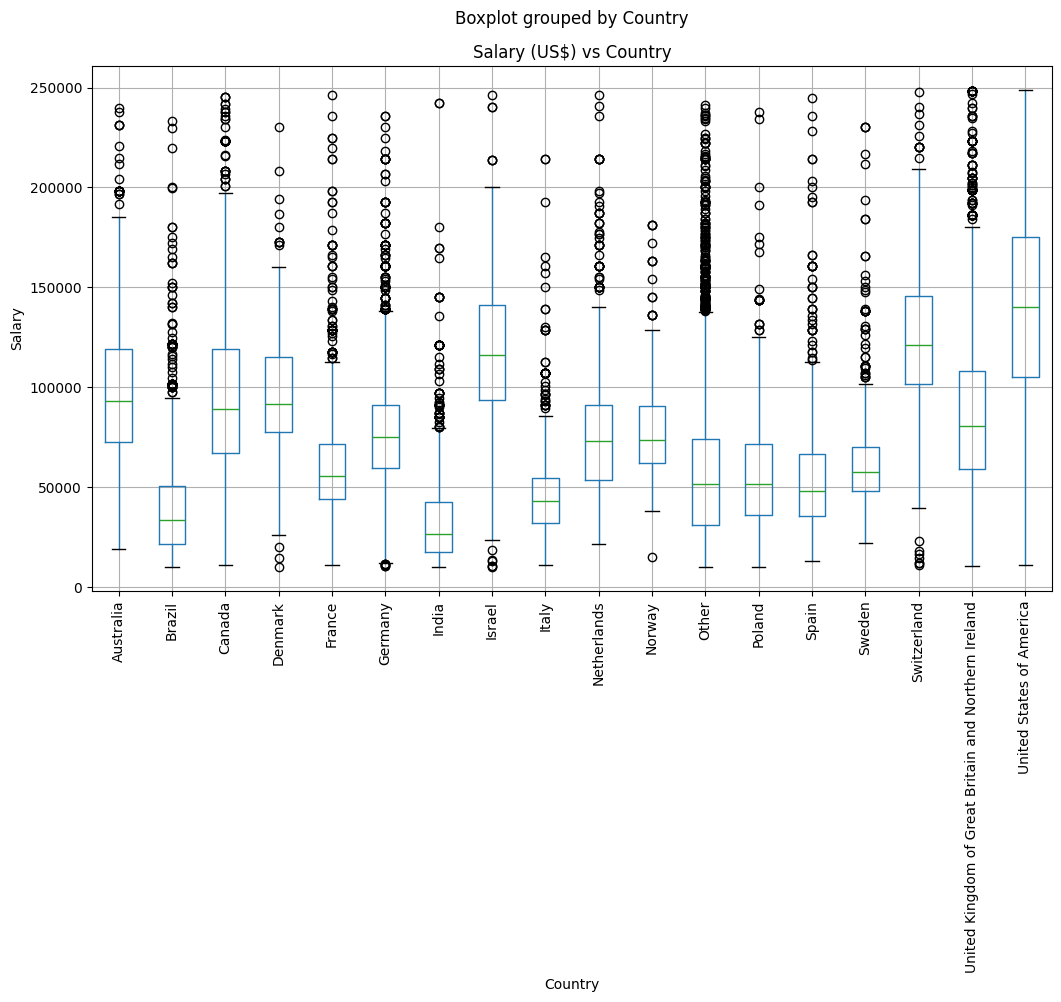

In [59]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
ax.set_title('Salary (US$) vs Country')  
ax.set_ylabel('Salary')  
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  
plt.show()  

In [60]:
df[df['Country'] != 'Other']

,Country,EdLevel,YearsCodePro,Salary
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,156000.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,96828.0
6,United States of America,Some college/university study without earning ...,3,135000.0
7,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,80000.0
11,Australia,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,78003.0
...,...,...,...,...
89156,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,195000.0
89158,Sweden,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,52981.0
89162,Brazil,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",24,50719.0
89167,India,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,15752.0


In [61]:
df['YearsCodePro'].unique()

array(['7', '21', '3', '15', '9', 'Less than 1 year', '10', '2', '6',
       '14', '5', '19', '13', '4', '16', '28', '11', '8', '24', '25',
       '12', '20', '18', '30', '27', '23', '17', '43', '38', '33', '29',
       '22', '1', '40', '34', '42', '26', '31', '36', '39', '32', '44',
       '37', '35', '48', 'More than 50 years', '45', '41', '50', '46',
       '49', '47'], dtype=object)

In [62]:
def convert_years(years):
    if years == 'Less than 1 year':
        return 0.5
    if years == 'More than 50 years':
        return 50
    return float(years)
df['YearsCodePro'] = df['YearsCodePro'].apply(convert_years)

In [63]:
df['YearsCodePro'].unique()

array([ 7. , 21. ,  3. , 15. ,  9. ,  0.5, 10. ,  2. ,  6. , 14. ,  5. ,
       19. , 13. ,  4. , 16. , 28. , 11. ,  8. , 24. , 25. , 12. , 20. ,
       18. , 30. , 27. , 23. , 17. , 43. , 38. , 33. , 29. , 22. ,  1. ,
       40. , 34. , 42. , 26. , 31. , 36. , 39. , 32. , 44. , 37. , 35. ,
       48. , 50. , 45. , 41. , 46. , 49. , 47. ])

In [64]:
df['EdLevel'].value_counts()

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          16688
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                        9666
Some college/university study without earning a degree                                 3891
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         1707
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     1471
Associate degree (A.A., A.S., etc.)                                                    1206
Something else                                                                          339
Primary/elementary school                                                               111
Name: count, dtype: int64

In [65]:
def convert_ed(x):
    if "Bachelor’s degree" in x:
        return "Bachelor’s degree"
    if "Master’s degree" in x:
        return "Master’s degree"
    if "Professional degree" in x :
        return "Post grad"
    return "Less than a Bachelor's"
df['EdLevel'] = df['EdLevel'].apply(convert_ed)
df['EdLevel'].value_counts()

EdLevel
Bachelor’s degree         16688
Master’s degree            9666
Less than a Bachelor's     7018
Post grad                  1707
Name: count, dtype: int64

In [66]:
from sklearn.preprocessing import LabelEncoder 
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df['EdLevel'].unique()

array([0, 1, 2, 3])

In [67]:
le_country = LabelEncoder() 
df['Country'] = le_country.fit_transform(df['Country'])
df['Country'].value_counts()

Country
17    9158
11    7637
5     3148
16    3009
2     1756
4     1441
6     1130
9      983
0      962
13     957
14     849
1      840
8      814
12     684
15     480
3      425
10     424
7      382
Name: count, dtype: int64

In [68]:
X = df.drop('Salary', axis=1)
Y = df['Salary']

In [69]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X,Y.values)

LinearRegression()

In [70]:
y_pred = linear_reg.predict(X)

In [71]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(Y,y_pred))
error

45194.223164126495

In [72]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, Y.values)
y_pred = dec_tree_reg.predict(X)
error = np.sqrt(mean_squared_error(Y,y_pred))
error

32135.61139716466

In [73]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(n_estimators=100,  
                                         max_depth=None,   
                                         min_samples_split=2,
                                         min_samples_leaf=1,   
                                         random_state=0)
random_forest_reg.fit(X,Y.values)
y_pred = random_forest_reg.predict(X)
error = np.sqrt(mean_squared_error(Y,y_pred))
error

32193.44085235294

In [74]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [None, 2, 4, 8, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
regressor = RandomForestRegressor(random_state=0)
gs = GridSearchCV(regressor,
                  param_grid,
                  cv=5,  # 5-fold cross-validation
                  scoring='neg_mean_squared_error',
                  n_jobs=-1)
gs.fit(X,Y.values)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 4, 8, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 200, 250]},
             scoring='neg_mean_squared_error')

In [75]:
regressor = gs.best_estimator_
regressor.fit(X,Y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(Y,y_pred))
error

32953.80890225803

In [76]:
X

,Country,EdLevel,YearsCodePro
3,17,0,7.0
5,16,1,21.0
6,17,1,3.0
7,17,0,3.0
8,11,2,15.0
...,...,...,...
89160,11,3,5.0
89162,1,2,24.0
89167,6,0,2.0
89170,4,2,9.0


In [83]:
#example test case 
X = np.array([["India","Bachelor’s degree",2]])
X[:,0]=le_country.transform(X[:,0])
X[:,1]=le_education.transform(X[:,1])
X=X.astype(float)
X

array([[6., 0., 2.]])

In [84]:
y_pred = regressor.predict(X)
y_pred

C:\Users\manis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([23944.89107589])

In [85]:
import pickle 

In [86]:
data = {"model":regressor,"le_country":le_country,"le_education":le_education}
with open('saved_steps.pkl','wb') as file:
    pickle.dump(data,file)

In [87]:
with open('saved_steps.pkl','rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]
y_pred = regressor_loaded.predict(X)
y_pred

C:\Users\manis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([23944.89107589])